# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
import sys
sys.path.append('../') # Ajust the api key path to read it from the right folder.
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belmonte
Processing Record 2 of Set 1 | remire-montjoly
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | neuhaus
Processing Record 5 of Set 1 | udachny
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | i-n-salah
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | gitarama
Processing Record 13 of Set 1 | mezhdurechensk
Processing Record 14 of Set 1 | lorengau
Processing Record 15 of Set 1 | kyosai
Processing Record 16 of Set 1 | pokachi
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | bayan nur
City not found. Skipping...
Processing Record 20 of Set 1 | ciudad melchor muzquiz
Processing Record 21 of Set 1 | hassi messaoud
Processing 

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,belmonte,-15.8631,-38.8828,301.33,68,27,5.88,BR,1731432482
1,remire-montjoly,4.9167,-52.2667,300.17,89,75,1.54,GF,1731432484
2,grytviken,-54.2811,-36.5092,272.83,79,98,5.42,GS,1731432485
3,neuhaus,49.1440,15.0030,274.86,94,51,1.34,CZ,1731432486
4,udachny,66.4167,112.4000,258.35,96,100,2.15,RU,1731432487


In [16]:
# Convert 'Max Temp' from Kelvin to Fahrenheit
city_data_df["Max Temp"] = (city_data_df["Max Temp"] - 273.15) * 9/5 + 32

In [ ]:
# Convert the "Date" column from a Unix timestamp to a date
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit="s").dt.date
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,belmonte,-15.8631,-38.8828,82.724,68,27,5.88,BR,2024-11-12
1,remire-montjoly,4.9167,-52.2667,80.636,89,75,1.54,GF,2024-11-12
2,grytviken,-54.2811,-36.5092,31.424,79,98,5.42,GS,2024-11-12
3,neuhaus,49.1440,15.0030,35.078,94,51,1.34,CZ,2024-11-12
4,udachny,66.4167,112.4000,5.360,96,100,2.15,RU,2024-11-12


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,belmonte,-15.8631,-38.8828,82.724,68,27,5.88,BR,2024-11-12
1,remire-montjoly,4.9167,-52.2667,80.636,89,75,1.54,GF,2024-11-12
2,grytviken,-54.2811,-36.5092,31.424,79,98,5.42,GS,2024-11-12
3,neuhaus,49.1440,15.0030,35.078,94,51,1.34,CZ,2024-11-12
4,udachny,66.4167,112.4000,5.360,96,100,2.15,RU,2024-11-12


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

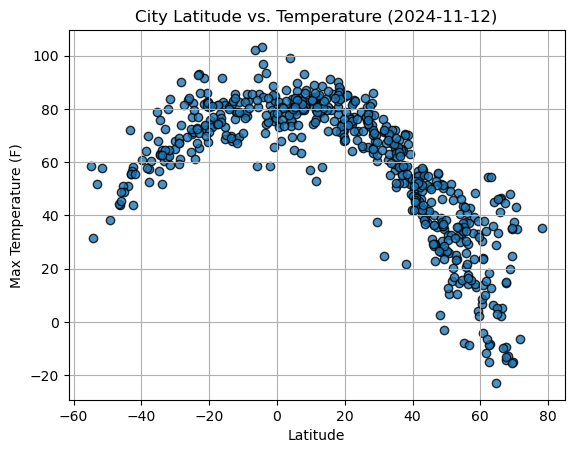

In [48]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2024-11-12)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

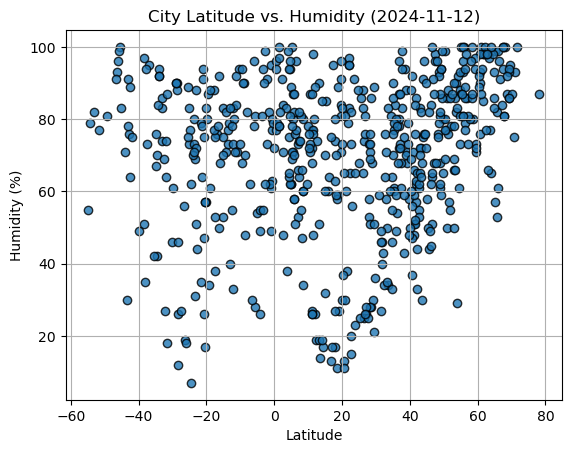

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-11-12)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

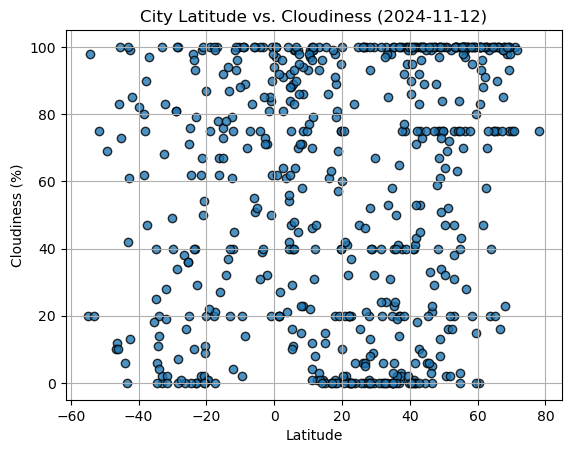

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-11-12)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

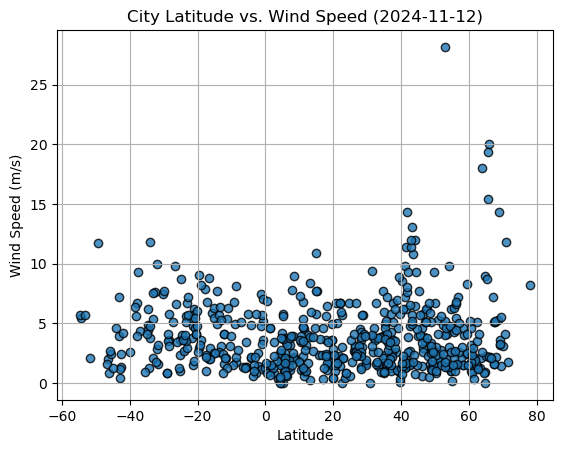

In [51]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-11-12)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title, plot_filename):
    slope, intercept, r_value, p_value, std_err = linregress(x , y)
    regress_values = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create scatter plot and regression line
    plt.scatter(x, y, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
    plt.plot(x, regress_values, "r-", label=line_eq)

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
        
    # Display r-squared value
    print(f"R-squared: {r_value**2:.2f}")

    # Show the plot
    plt.savefig(plot_filename)
    plt.grid(True)
    plt.show()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,remire-montjoly,4.9167,-52.2667,80.636,89,75,1.54,GF,2024-11-12
3,neuhaus,49.1440,15.0030,35.078,94,51,1.34,CZ,2024-11-12
4,udachny,66.4167,112.4000,5.360,96,100,2.15,RU,2024-11-12
8,albany,42.6001,-73.9662,46.292,55,10,2.68,US,2024-11-12
9,i-n-salah,27.1935,2.4607,73.670,26,100,2.37,DZ,2024-11-12


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,belmonte,-15.8631,-38.8828,82.724,68,27,5.88,BR,2024-11-12
2,grytviken,-54.2811,-36.5092,31.424,79,98,5.42,GS,2024-11-12
5,east london,-33.0153,27.9116,72.536,83,0,2.06,ZA,2024-11-12
6,invercargill,-46.4000,168.3500,44.024,93,12,1.98,NZ,2024-11-12
7,waitangi,-43.9535,-176.5597,51.080,71,6,4.61,NZ,2024-11-12


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.74


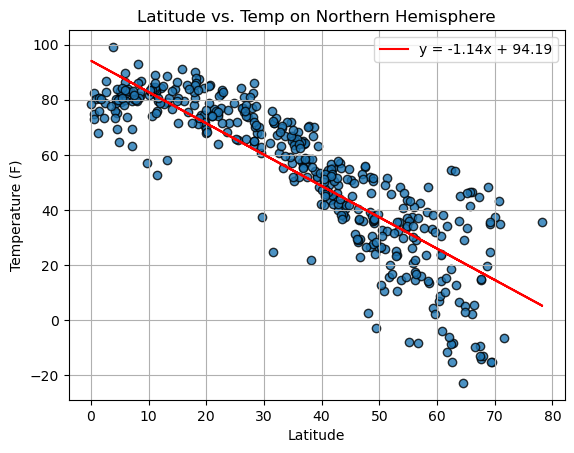

In [61]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    xlabel="Latitude",
    ylabel="Temperature (F)",
    title="Latitude vs. Temp on Northern Hemisphere",
    plot_filename="../output_data/Fig5.png"
)

R-squared: 0.51


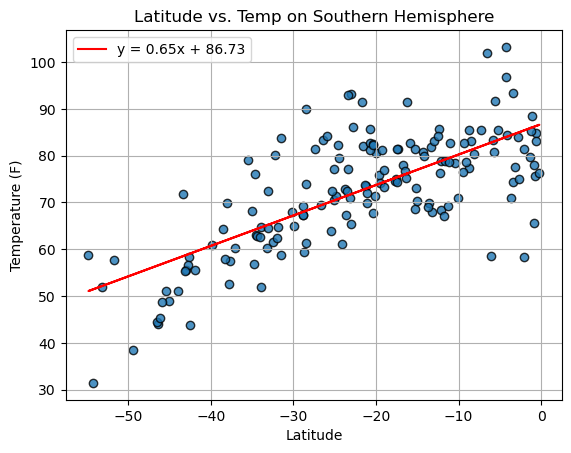

In [76]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    xlabel="Latitude",
    ylabel="Temperature (F)",
    title="Latitude vs. Temp on Southern Hemisphere",
    plot_filename="../output_data/Fig6.png"
)

**Discussion about the linear relationship:** The closest the city is from the equator line, higher is the temperature. There are more countries close to the equator line on the North than on the South. The Northern Hemisphere has also more cities with latitude +/- 50 to +80.

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.10


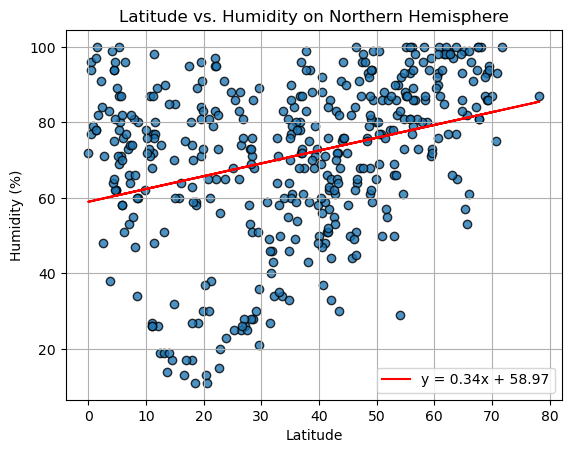

In [70]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    xlabel="Latitude",
    ylabel="Humidity (%)",
    title="Latitude vs. Humidity on Northern Hemisphere",
    plot_filename="../output_data/Fig7.png"
)

R-squared: 0.00


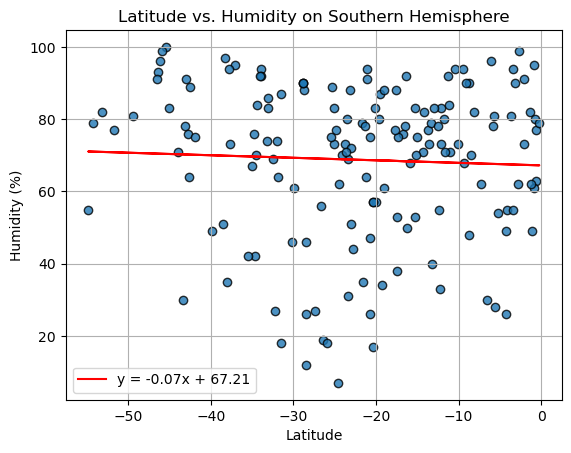

In [75]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    xlabel="Latitude",
    ylabel="Humidity (%)",
    title="Latitude vs. Humidity on Southern Hemisphere",
    plot_filename="../output_data/Fig8.png"
)

**Discussion about the linear relationship:** More than half ot the Northern and Southern cities have about 60% humidity at the moment. There are more cities in drier conditions around 0 Latitute on the North Hemisphere. The humidity on the South Hemisphere is more lenear. 

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.04


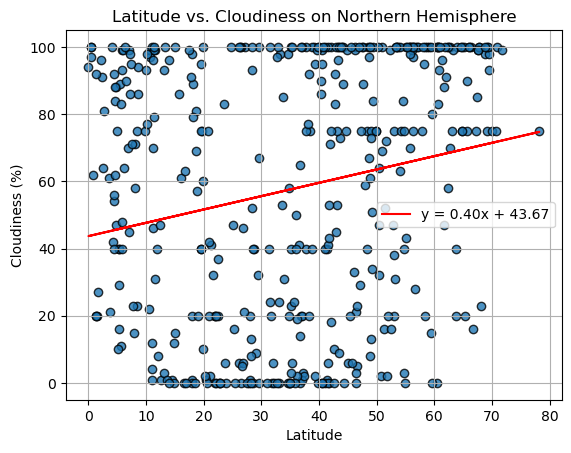

In [65]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    xlabel="Latitude",
    ylabel="Cloudiness (%)",
    title="Latitude vs. Cloudiness on Northern Hemisphere",
    plot_filename="../output_data/Fig9.png"
)

R-squared: 0.05


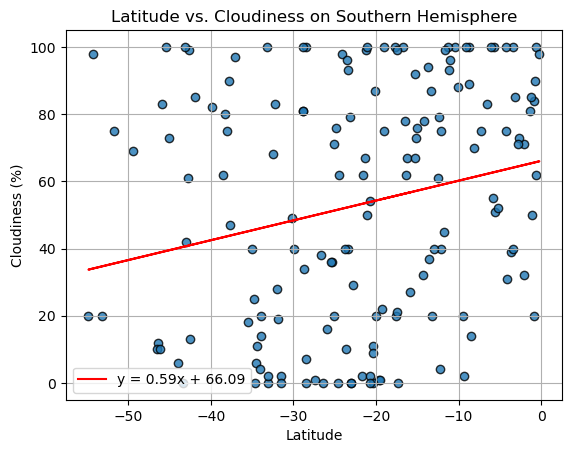

In [74]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    xlabel="Latitude",
    ylabel="Cloudiness (%)",
    title="Latitude vs. Cloudiness on Southern Hemisphere",
    plot_filename="../output_data/Fig10.png"
)

**Discussion about the linear relationship:** The absence of a clear linear trend in both hemispheres underscores the complexity of atmospheric conditions that affect cloud formation independently of latitude.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.04


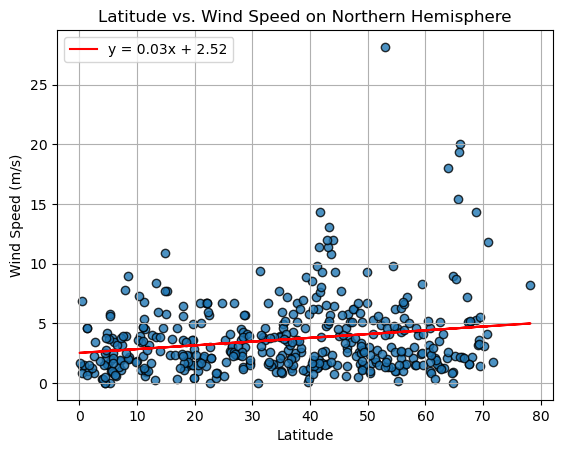

In [66]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    xlabel="Latitude",
    ylabel="Wind Speed (m/s)",
    title="Latitude vs. Wind Speed on Northern Hemisphere",
    plot_filename="../output_data/Fig11.png"
)

R-squared: 0.01


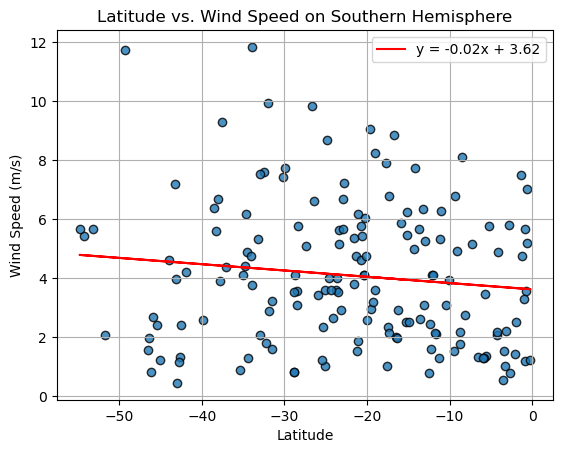

In [73]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    xlabel="Latitude",
    ylabel="Wind Speed (m/s)",
    title="Latitude vs. Wind Speed on Southern Hemisphere",
    plot_filename="../output_data/Fig12.png"
)

**Discussion about the linear relationship:** 
Wind speed generally picks up as you move toward higher latitudes. In the Northern Hemisphere, windier spots appear around 50°-60° latitude. Near the equator, wind tends to be calmer in both hemispheres.